## Exercise 1

### **Data Generation Task:** 

Generate two classes of 2D data points (1000 samples per class) using multivariate normal distributions. Use the following parameters:  

- Class 0:

    Mean = $[2, 2]$,
    
    Covariance matrix = $[[0.5, 0], [0, 0.5]]$ (i.e., variance of $0.5$ along each dimension, no covariance).  

- Class 1:

    Mean = $[5, 5]$,
    
    Covariance matrix = $[[0.5, 0], [0, 0.5]]$.  

These parameters ensure the classes are mostly linearly separable, with minimal overlap due to the distance between means and low variance. Plot the data points (using libraries like matplotlib if desired) to visualize the separation, coloring points by class.

### **Perceptron Implementation Task:**

Implement a single-layer perceptron from scratch to classify the generated data into the two classes. You may use NumPy only for basic linear algebra operations (e.g., matrix multiplication, vector addition/subtraction, dot products). Do not use any pre-built machine learning libraries (e.g., no scikit-learn) or NumPy functions that directly implement perceptron logic.  

- Initialize weights (w) as a 2D vector (plus a bias term b).  
- Use the perceptron learning rule: For each misclassified sample $(x, y)$, update $w = w + η * y * x$ and $b = b + η * y$, where $η$ is the learning rate (start with $η=0.01$).  
- Train the model until convergence (no weight updates occur in a full pass over the dataset) or for a maximum of 100 epochs, whichever comes first. If convergence is not achieved by 100 epochs, report the accuracy at that point. Track accuracy after each epoch.  
- After training, evaluate accuracy on the full dataset and plot the decision boundary (line defined by $w·x + b = 0$) overlaid on the data points. Additionally, plot the training accuracy over epochs to show convergence progress. Highlight any misclassified points in a separate plot or by different markers in the decision boundary plot.  

Report the final weights, bias, accuracy, and discuss why the data's separability leads to quick convergence.

Shape dos dados: (2000, 2) (2000,)


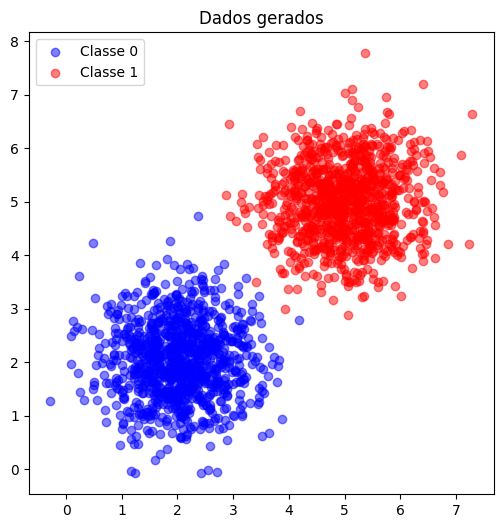

In [39]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

mean_0 = [2, 2]
cov_0 = [[0.5, 0], [0, 0.5]]

mean_1 = [5, 5]
cov_1 = [[0.5, 0], [0, 0.5]]

X0 = np.random.multivariate_normal(mean_0, cov_0, 1000)
X1 = np.random.multivariate_normal(mean_1, cov_1, 1000)

y0 = np.zeros(1000)
y1 = np.ones(1000)

X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

print("Shape dos dados:", X.shape, y.shape)

plt.figure(figsize=(6,6))
plt.scatter(X0[:,0], X0[:,1], color="blue", alpha=0.5, label="Classe 0")
plt.scatter(X1[:,0], X1[:,1], color="red", alpha=0.5, label="Classe 1")
plt.legend()
plt.title("Dados gerados")
plt.show()


In [34]:
class Perceptron:
    def __init__(self, input_dim, learning_rate=0.01):
        self.w = np.random.randn(input_dim) * 0.01
        self.b = 0.0
        self.lr = learning_rate
        self.history = []  

    def activation(self, z):
        return np.where(z >= 0, 1, 0)

    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        return self.activation(z)

    def fit(self, X, y, epochs=100):
        n_samples = X.shape[0]
        for epoch in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                pred = self.predict(xi)
                error = target - pred
                if error != 0: 
                    self.w += self.lr * error * xi
                    self.b += self.lr * error
                    errors += 1
                    
            y_pred = self.predict(X)
            acc = np.mean(y_pred == y)
            self.history.append(acc)
            
            print(f"Época {epoch+1}/{epochs} - Erros: {errors}, Acurácia: {acc:.3f}")
            if errors == 0:
                print("Convergência atingida!")
                break


In [35]:
perceptron = Perceptron(input_dim=2, learning_rate=0.01)
perceptron.fit(X, y, epochs=1000)

print("Pesos finais:", perceptron.w)
print("Bias final:", perceptron.b)

Época 1/1000 - Erros: 2, Acurácia: 0.500
Época 2/1000 - Erros: 3, Acurácia: 0.500
Época 3/1000 - Erros: 3, Acurácia: 0.500
Época 4/1000 - Erros: 3, Acurácia: 0.500
Época 5/1000 - Erros: 3, Acurácia: 0.501
Época 6/1000 - Erros: 3, Acurácia: 0.505
Época 7/1000 - Erros: 3, Acurácia: 0.590
Época 8/1000 - Erros: 2, Acurácia: 0.501
Época 9/1000 - Erros: 3, Acurácia: 0.502
Época 10/1000 - Erros: 3, Acurácia: 0.509
Época 11/1000 - Erros: 3, Acurácia: 0.519
Época 12/1000 - Erros: 3, Acurácia: 0.543
Época 13/1000 - Erros: 3, Acurácia: 0.736
Época 14/1000 - Erros: 2, Acurácia: 0.511
Época 15/1000 - Erros: 3, Acurácia: 0.519
Época 16/1000 - Erros: 3, Acurácia: 0.538
Época 17/1000 - Erros: 3, Acurácia: 0.557
Época 18/1000 - Erros: 3, Acurácia: 0.607
Época 19/1000 - Erros: 3, Acurácia: 0.808
Época 20/1000 - Erros: 2, Acurácia: 0.552
Época 21/1000 - Erros: 3, Acurácia: 0.582
Época 22/1000 - Erros: 3, Acurácia: 0.630
Época 23/1000 - Erros: 3, Acurácia: 0.825
Época 24/1000 - Erros: 2, Acurácia: 0.573
É

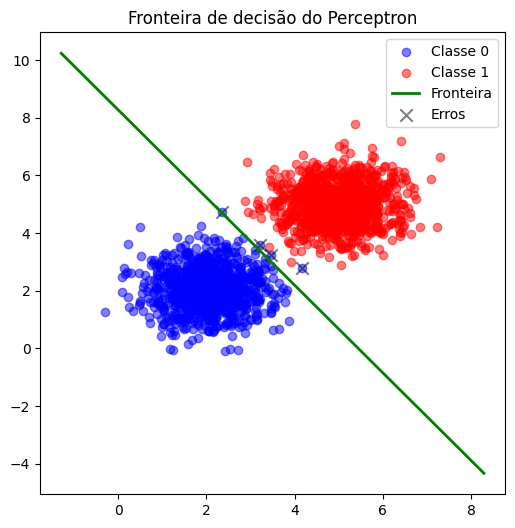

In [40]:
def plot_decision_boundary(X, y, model):
    plt.figure(figsize=(6,6))

    plt.scatter(X[y==0, 0], X[y==0, 1], color="blue", alpha=0.5, label="Classe 0")
    plt.scatter(X[y==1, 0], X[y==1, 1], color="red", alpha=0.5, label="Classe 1")

    x_vals = np.linspace(np.min(X[:,0])-1, np.max(X[:,0])+1, 100)
    y_vals = -(model.w[0] * x_vals + model.b) / model.w[1]

    plt.plot(x_vals, y_vals, color="green", linewidth=2, label="Fronteira")
    
    y_pred = model.predict(X)
    misclassified = X[y != y_pred]
    if len(misclassified) > 0:
        plt.scatter(
            misclassified[:,0], misclassified[:,1],
            color="black", marker="x", s=80, label="Erros", alpha=0.5
        )


    plt.legend()
    plt.title("Fronteira de decisão do Perceptron")
    plt.show()

plot_decision_boundary(X, y, perceptron)

## Exercise 2

### **Data Generation Task:**  

Generate two classes of 2D data points (1000 samples per class) using multivariate normal distributions. Use the following parameters:

- Class 0:

    Mean = $[3, 3]$,

    Covariance matrix = $[[1.5, 0], [0, 1.5]]$ (i.e., higher variance of 1.5 along each dimension).

- Class 1:

    Mean = $[4, 4]$,

    Covariance matrix = $[[1.5, 0], [0, 1.5]]$.  

These parameters create partial overlap between classes due to closer means and higher variance, making the data not fully linearly separable. Plot the data points to visualize the overlap, coloring points by class.

### **Perceptron Implementation Task:**  

Using the same implementation guidelines as in Exercise 1, train a perceptron on this dataset.  

- Follow the same initialization, update rule, and training process.  
- Train the model until convergence (no weight updates occur in a full pass over the dataset) or for a maximum of 100 epochs, whichever comes first. If convergence is not achieved by 100 epochs, report the accuracy at that point and note any oscillation in updates; consider reporting the best accuracy achieved over multiple runs (e.g., average over 5 random initializations). Track accuracy after each epoch.  
- Evaluate accuracy after training and plot the decision boundary overlaid on the data points. Additionally, plot the training accuracy over epochs to show convergence progress (or lack thereof). Highlight any misclassified points in a separate plot or by different markers in the decision boundary plot.  

Report the final weights, bias, accuracy, and discuss how the overlap affects training compared to Exercise 1 (e.g., slower convergence or inability to reach 100% accuracy).

Shape dos dados: (2000, 2) (2000,)


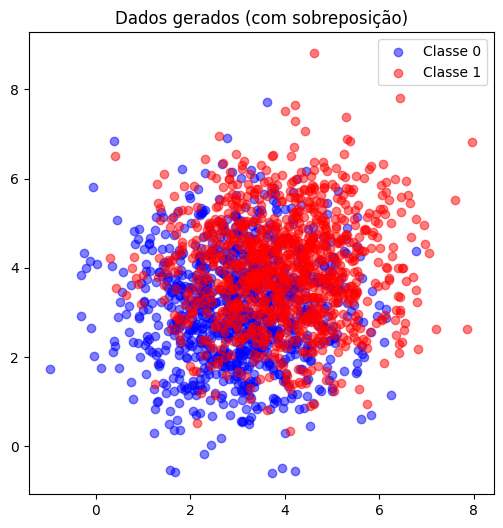

In [41]:
np.random.seed(42)

mean_0 = [3, 3]
cov_0 = [[1.5, 0], [0, 1.5]]

mean_1 = [4, 4]
cov_1 = [[1.5, 0], [0, 1.5]]

X0 = np.random.multivariate_normal(mean_0, cov_0, 1000)
X1 = np.random.multivariate_normal(mean_1, cov_1, 1000)

y0 = np.zeros(1000)
y1 = np.ones(1000)

X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

print("Shape dos dados:", X.shape, y.shape)

plt.figure(figsize=(6,6))
plt.scatter(X0[:,0], X0[:,1], color="blue", alpha=0.5, label="Classe 0")
plt.scatter(X1[:,0], X1[:,1], color="red", alpha=0.5, label="Classe 1")
plt.legend()
plt.title("Dados gerados (com sobreposição)")
plt.show()


In [42]:
perceptron = Perceptron(input_dim=2, learning_rate=0.01)
perceptron.fit(X, y, epochs=100)

print("Pesos finais:", perceptron.w)
print("Bias final:", perceptron.b)


Época 1/100 - Erros: 3, Acurácia: 0.503
Época 2/100 - Erros: 2, Acurácia: 0.501
Época 3/100 - Erros: 2, Acurácia: 0.506
Época 4/100 - Erros: 3, Acurácia: 0.506
Época 5/100 - Erros: 3, Acurácia: 0.500
Época 6/100 - Erros: 4, Acurácia: 0.500
Época 7/100 - Erros: 2, Acurácia: 0.500
Época 8/100 - Erros: 3, Acurácia: 0.504
Época 9/100 - Erros: 2, Acurácia: 0.500
Época 10/100 - Erros: 2, Acurácia: 0.501
Época 11/100 - Erros: 2, Acurácia: 0.501
Época 12/100 - Erros: 4, Acurácia: 0.502
Época 13/100 - Erros: 4, Acurácia: 0.501
Época 14/100 - Erros: 3, Acurácia: 0.510
Época 15/100 - Erros: 3, Acurácia: 0.500
Época 16/100 - Erros: 2, Acurácia: 0.500
Época 17/100 - Erros: 3, Acurácia: 0.508
Época 18/100 - Erros: 2, Acurácia: 0.502
Época 19/100 - Erros: 2, Acurácia: 0.502
Época 20/100 - Erros: 2, Acurácia: 0.504
Época 21/100 - Erros: 4, Acurácia: 0.500
Época 22/100 - Erros: 2, Acurácia: 0.500
Época 23/100 - Erros: 2, Acurácia: 0.501
Época 24/100 - Erros: 4, Acurácia: 0.501
Época 25/100 - Erros: 4, 

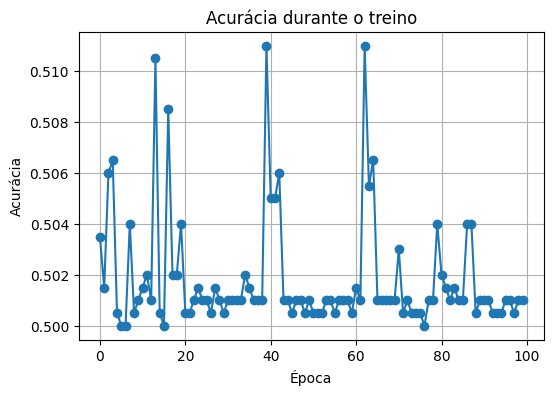

In [43]:
plt.figure(figsize=(6,4))
plt.plot(perceptron.history, marker="o")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.title("Acurácia durante o treino")
plt.grid(True)
plt.show()


Os pesos finais encontrados foram aproximadamente [0.0216, 0.0432], com bias = -0.03, e a acurácia final ficou em torno de 50%, praticamente equivalente ao acaso. Isso ocorre porque, diferentemente do Exercise 1, as distribuições de classe aqui têm médias muito próximas e alta variância, gerando grande sobreposição entre as amostras. Essa falta de separabilidade linear faz com que o perceptron oscile durante o treino, sem conseguir convergir para 100% de acurácia, evidenciando sua limitação em problemas não linearmente separáveis.